<a href="https://colab.research.google.com/github/Sowmya-2348562/Advanced-Data-Analytics/blob/main/2348562_TS_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/AirPassengers - AirPassengers.csv')

In [ ]:
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.describe()

,value
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
df.isnull().sum()

date     0
value    0
dtype: int64

In [ ]:
df.shape

(144, 2)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

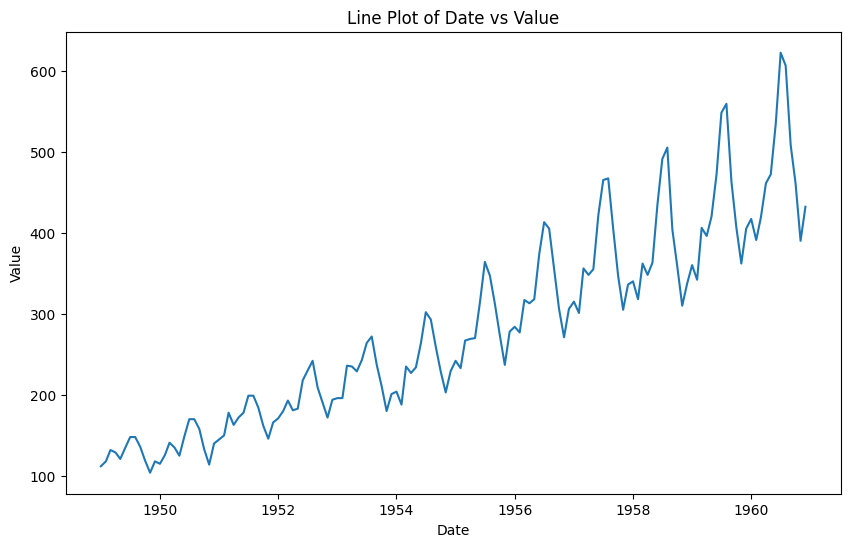

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Plot of Date vs Value')
plt.show()


In [ ]:
df=df.set_index('date',inplace=False)

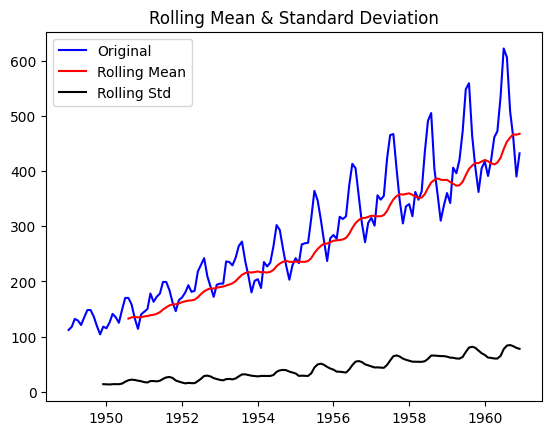

In [ ]:
movingaverage=df.rolling(window=20).mean()
movingSTD=df.rolling(window=12).std()
plt.plot(df,color='blue',label='Original')
plt.plot(movingaverage,color='red',label='Rolling Mean')
plt.plot(movingSTD,color='black',label='Rolling Std')
plt.legend( loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

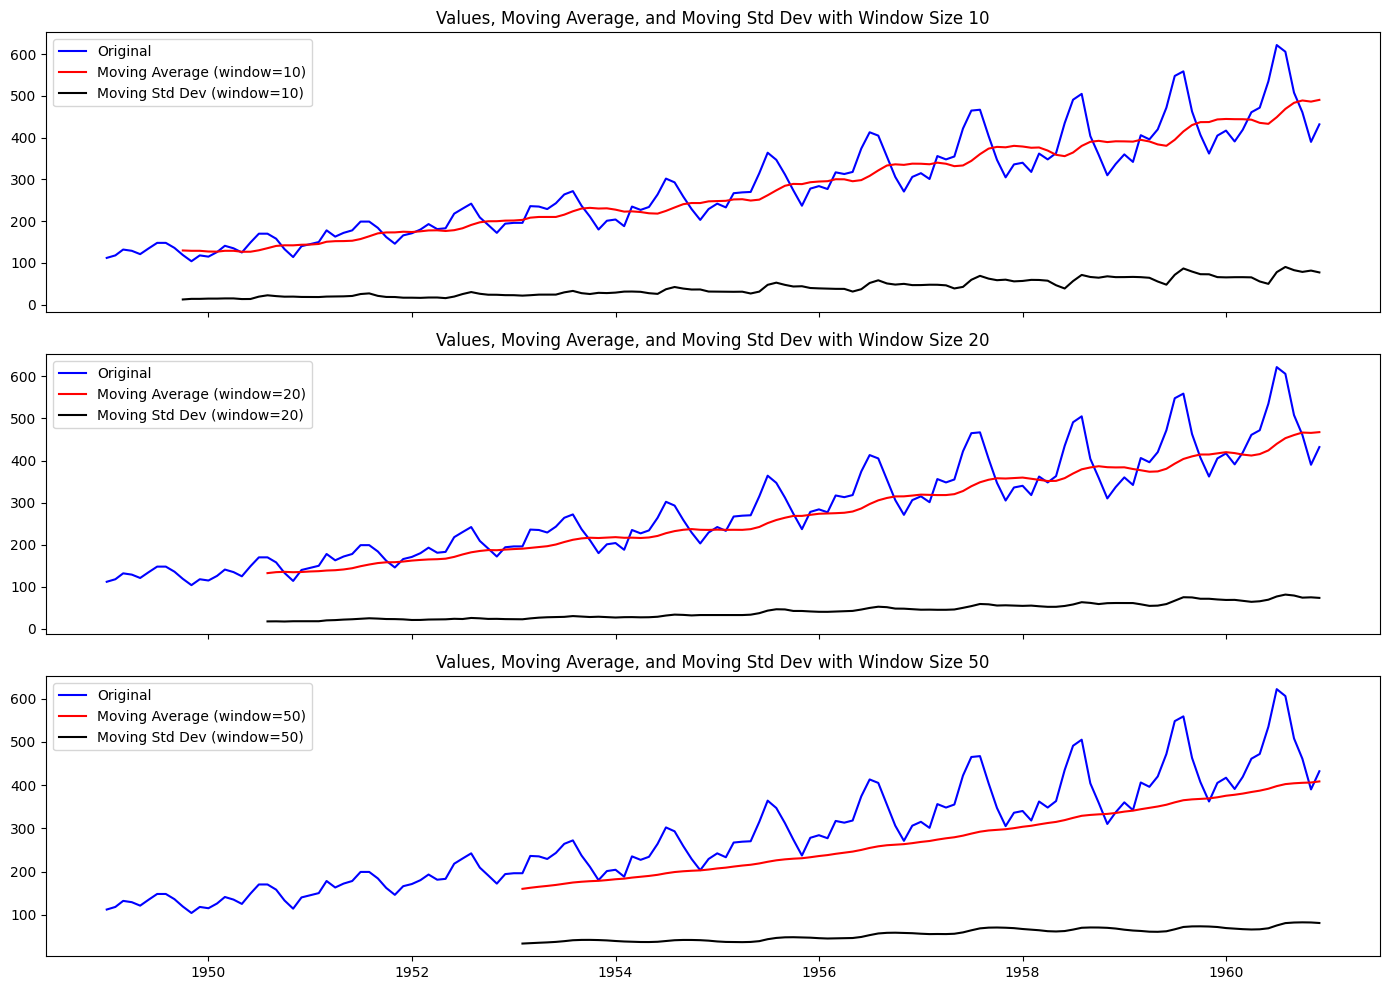

In [ ]:
window_sizes = [10, 20, 50]  # Example window sizes

fig, axs = plt.subplots(len(window_sizes), 1, figsize=(14, 10), sharex=True)

for i, window in enumerate(window_sizes):
    moving_average = df['value'].rolling(window=window).mean()
    moving_std = df['value'].rolling(window=window).std()

    # Plot the original data, moving average, and moving standard deviation
    axs[i].plot(df['value'], color='blue', label='Original')
    axs[i].plot(moving_average, color='red', label=f'Moving Average (window={window})')
    axs[i].plot(moving_std, color='black', label=f'Moving Std Dev (window={window})')
    axs[i].legend(loc='best')
    axs[i].set_title(f'Values, Moving Average, and Moving Std Dev with Window Size {window}')

plt.tight_layout()
plt.show()

Null Hypothesis(H0): The data is non-stationary

Alternate Hypothesis(H1): The data is stationary

# Augmented Dickey-Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adf_test(df)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


The data is considered non-stationary since the test statistic is greater than any critical value, leading to the inability to reject the null hypothesis (H0).


# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(df)

Results of KPSS Test:
Test Statistic           1.651312
p-value                  0.010000
#Lags Used               8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-14-9f4f78554842>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


If both the ADF and KPSS tests say the series is stationary, then it is stationary.

If both tests say the series is non-stationary, then it is indeed non-stationary.

If ADF shows non-stationarity but KPSS shows stationarity, the series is trend stationary, and we need to remove the trend to achieve strict stationarity.

If ADF shows stationarity but KPSS shows non-stationarity, the series is difference stationary, and we need to apply differencing to achieve stationarity.

Converting Non-stationary to Stationary

**DIFFERENCING**

<Axes: xlabel='date'>

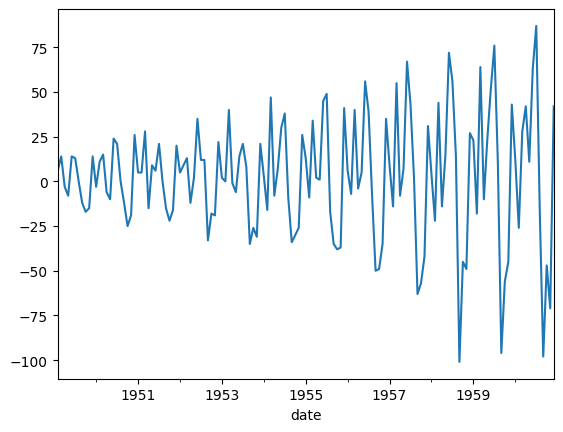

In [ ]:
df['value_diff']=df['value']-df['value'].shift(1)
df['value_diff'].dropna().plot()

**SEASONAL DIFFERENCING**

<Axes: xlabel='date'>

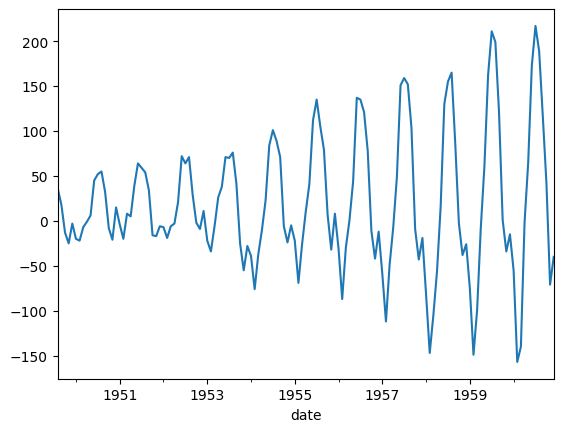

In [ ]:
n=7
df['value_diff_n']=df['value']-df['value'].shift(n)
df['value_diff_n'].dropna().plot()

TRANSFORMATION

Common transformation method includes power transform (value is very very small), square root transform (if value is big) and log transform. used to normalize skewed or non-normal data, making them suitable for various analytical approaches.

<Axes: xlabel='date'>

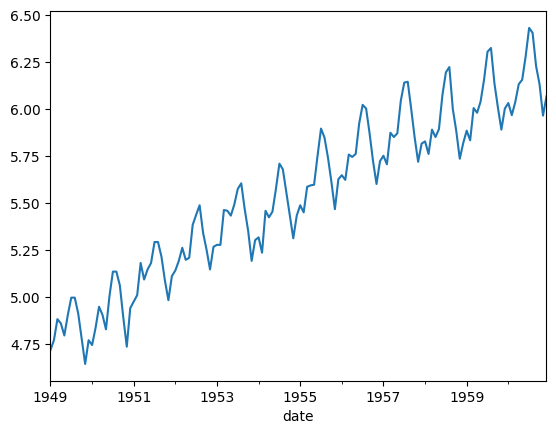

In [ ]:
df['value_log']=np.log(df['value'])
df['value_log'].dropna().plot()

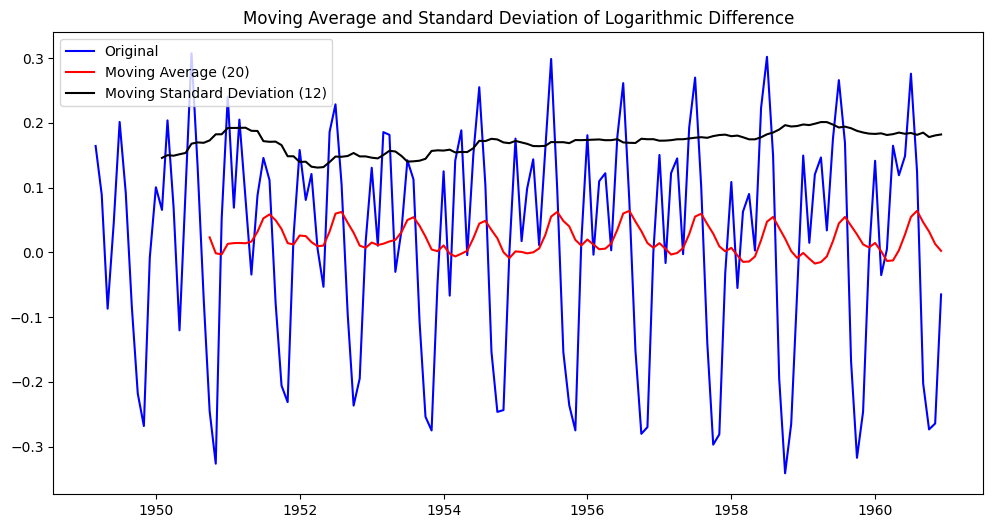

In [ ]:
df['value_log'] = np.log(df['value'].replace(0, np.nan))
df['value_log_diff'] = df['value_log'] - df['value_log'].shift(2)

# Drop NaN values resulting from shift and log operations
df['value_log_diff'].dropna(inplace=True)

# Calculate moving average and moving standard deviation
moving_average = df['value_log_diff'].rolling(window=20).mean()
moving_std = df['value_log_diff'].rolling(window=12).std()

# Plot the original data, moving average, and moving standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df['value_log_diff'], color='blue', label='Original')
plt.plot(moving_average, color='red', label='Moving Average (20)')
plt.plot(moving_std, color='black', label='Moving Standard Deviation (12)')
plt.legend(loc='best')
plt.title('Moving Average and Standard Deviation of Logarithmic Difference')
plt.show()

# Testing if the log values are stationary or not

In [ ]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adf_test(df['value_log'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


**Non-stationary as test staistic>any critical value**

In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(df['value_log'])

Results of KPSS Test:
Test Statistic           1.668651
p-value                  0.010000
#Lags Used               8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-20-6e7e2d7bf3a5>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


**Non-stationary as test staistic>any critical value**

<Axes: xlabel='date'>

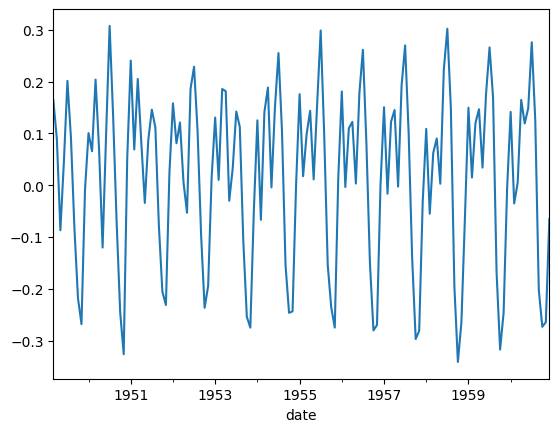

In [ ]:
df['value_log_diff'].dropna().plot()

# Components of the time series data

**SEASONAL**

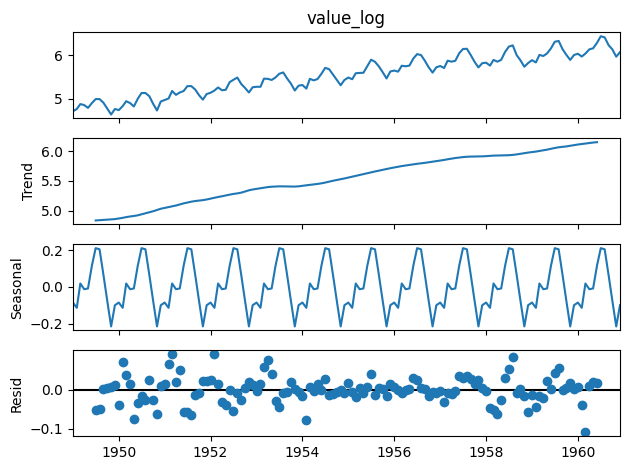

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['value_log'], model='additive')
decomposition.plot()
plt.show()

In [ ]:
decomposition.trend

date
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [ ]:
decomposition.seasonal

date
1949-01-01   -0.085815
1949-02-01   -0.114413
1949-03-01    0.018113
1949-04-01   -0.013046
1949-05-01   -0.008966
                ...   
1960-08-01    0.204512
1960-09-01    0.064836
1960-10-01   -0.075271
1960-11-01   -0.215846
1960-12-01   -0.100315
Name: seasonal, Length: 144, dtype: float64

In [ ]:
decomposition.resid[:20]

date
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
1949-12-01    0.011045
1950-01-01   -0.039093
1950-02-01    0.069306
1950-03-01    0.037236
1950-04-01    0.014028
1950-05-01   -0.075473
1950-06-01   -0.035148
1950-07-01   -0.015501
1950-08-01   -0.026120
Name: resid, dtype: float64

Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

Autocorrelation measures the relationship between a variable's current value and its past values.

Technical analysts can use autocorrelation to measure how much influence past prices for a security have on its future price.

A perfect positive correlation is indicated by an autocorrelation of +1, whereas a perfect negative correlation is represented by an autocorrelation of -1.


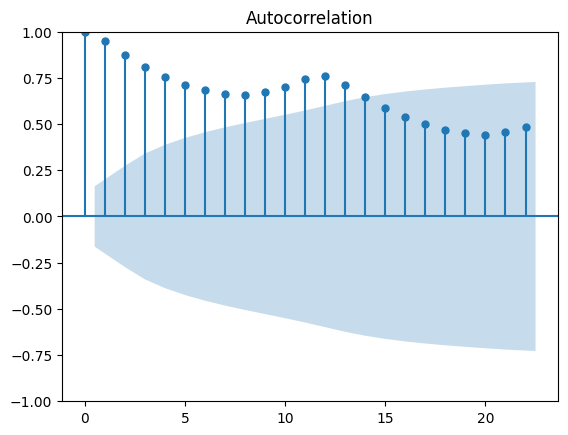

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['value'])
plt.show()

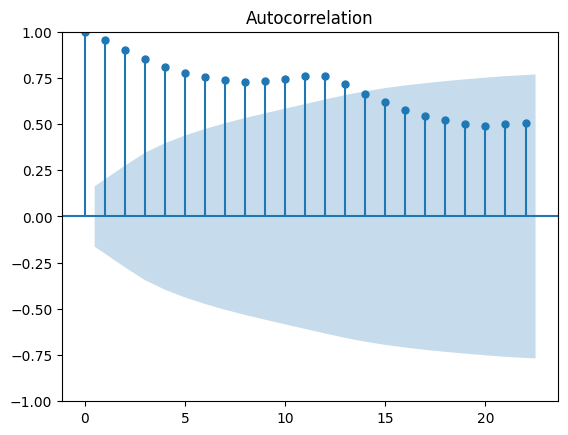

In [ ]:
plot_acf(df['value_log'])
plt.show()

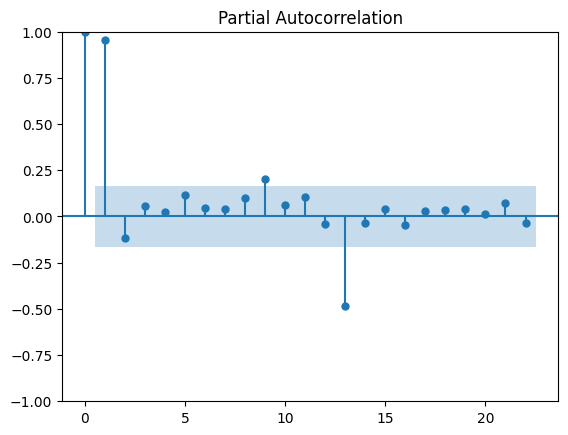

In [ ]:
plot_pacf(df['value_log'])
plt.show()

ARIMA

p=auto-regressive ,q=moving average, d=differencing

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Plotting AR model


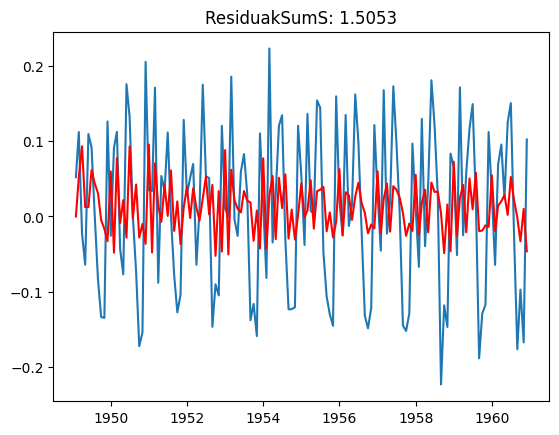

In [ ]:
ts_log=np.log(df['value']).diff().dropna()
model1=ARIMA(ts_log,order=(2,1,2))
model1_fit=model1.fit()
plt.plot(ts_log)
plt.plot(model1_fit.fittedvalues,color='red')
plt.title("ResiduakSumS: %.4f"%sum((model1_fit.fittedvalues-ts_log)**2))
print("Plotting AR model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR model


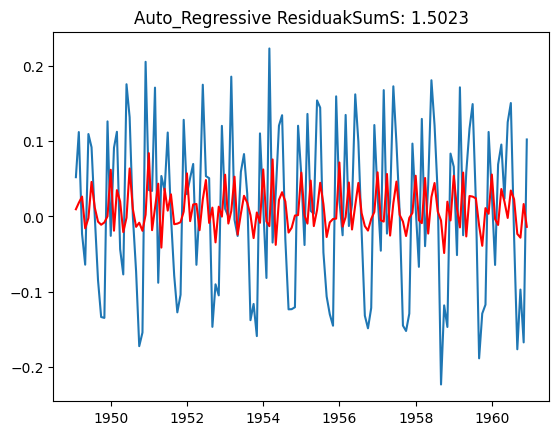

In [ ]:
ts_log=np.log(df['value']).diff().dropna()
model1=ARIMA(ts_log,order=(2,0,0))
model1_fit=model1.fit()
plt.plot(ts_log)
plt.plot(model1_fit.fittedvalues,color='red')
plt.title("Auto_Regressive ResiduakSumS: %.4f"%sum((model1_fit.fittedvalues-ts_log)**2))
print("Plotting AR model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR model


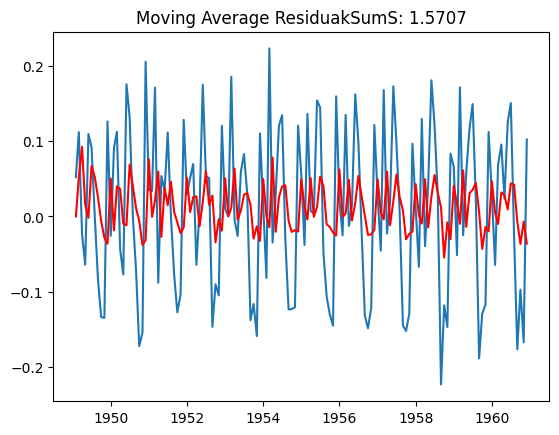

In [ ]:
ts_log=np.log(df['value']).diff().dropna()
model1=ARIMA(ts_log,order=(0,1,2))
model1_fit=model1.fit()
plt.plot(ts_log)
plt.plot(model1_fit.fittedvalues,color='red')
plt.title("Moving Average ResiduakSumS: %.4f"%sum((model1_fit.fittedvalues-ts_log)**2))
print("Plotting AR model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Plotting AR model


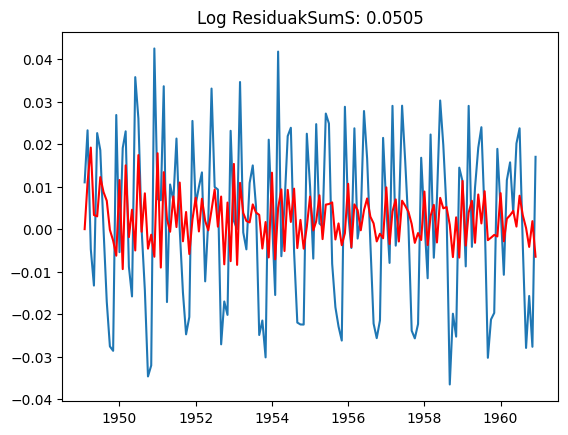

In [ ]:
ts_log=np.log(df['value_log']).diff().dropna()
model1=ARIMA(ts_log,order=(2,1,2))
model1_fit=model1.fit()
plt.plot(ts_log)
plt.plot(model1_fit.fittedvalues,color='red')
plt.title("Log ResiduakSumS: %.4f"%sum((model1_fit.fittedvalues-ts_log)**2))
print("Plotting AR model")